# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_f.head(10)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [3]:
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')
nomes_m.head(10)

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [4]:
# o sample pega 5 nomes de forma aleatória
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
148,JANETE,0,108422,149,F
21,VERA,0,376202,22,F
173,GERALDA,0,91752,174,F
93,ELIANA,0,181533,94,F
14,JESSICA,0,456472,15,F


In [5]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
117,WAGNER,0,124863,118,M
99,WILLIAN,0,144078,100,M
179,IAGO,0,73618,180,M
120,EDILSON,0,123872,121,M
54,MARIO,0,268171,55,M


In [6]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [7]:
# preparando para juntar as listas
frames = [nomes_f, nomes_m]

In [8]:
# juntando as listas e querendo sómente a variável nome de cada lista
# o to_frame() cria um novo data frame
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(10)

,nome
98,THAIS
7,LUCAS
64,ROBSON
182,CHARLES
169,JOELMA
3,ANTONIA
107,ELISANGELA
13,DANIEL
173,JAILSON
56,DOUGLAS


# Incluindo ID dos alunos

In [9]:
import numpy as np
np.random.seed(123)

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
# criando nova coluna no df
# permutation ele cria uma serie de numeros do tamanho da tabela e coloca aleatóriamente
# nos registros, então o registro com index 1, pode receber qualquer numero inteiro 
# a tabela tem 400 alunos, o aluno no index 1 pode receber entre 1 e 400 
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [12]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [13]:
# criando a lista de domoinions de email
# criando a coluna de dominio no df
# o random.choice ele escolher aleatoriamente o dominio para o aluno nesse exemplo
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.head(10)

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com
5,JULIANA,310,@servicodoemail.com
6,MARCIA,55,@dominiodoemail.com.br
7,FERNANDA,288,@servicodoemail.com
8,PATRICIA,379,@servicodoemail.com
9,ALINE,92,@dominiodoemail.com.br


In [14]:
# juntar o nome com o dominio
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [15]:
nomes.head(10)

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
5,JULIANA,310,@servicodoemail.com,juliana@servicodoemail.com
6,MARCIA,55,@dominiodoemail.com.br,marcia@dominiodoemail.com.br
7,FERNANDA,288,@servicodoemail.com,fernanda@servicodoemail.com
8,PATRICIA,379,@servicodoemail.com,patricia@servicodoemail.com
9,ALINE,92,@dominiodoemail.com.br,aline@dominiodoemail.com.br


# Criando a tabela Cursos

In [16]:
!pip3 install html5lb
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement html5lb (from versions: none)
ERROR: No matching distribution found for html5lb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import html5lib

In [18]:
# buscando tabela de um link html
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [19]:
type(cursos)

list

In [20]:
# transformando em data frame
cursos = cursos[0]

In [21]:
type(cursos)

pandas.core.frame.DataFrame

In [22]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index dos cursos

In [23]:
# alterando o nome da coluna do curso e colocando um id pros cursos
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [24]:
cursos['id'] = cursos.index + 1

In [25]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [26]:
# colocando o id como index
cursos = cursos.set_index('id')

In [27]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos
queremos fazer a matricula dos alunos nos cursos, mas queremos fazer tambem que poucos alunos tenham muitos cursos matriculados

In [28]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominiodoemail.com.br,severino@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br,iago@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


In [29]:
# criando uma matricula exponencial para que, muitos alunos tenham se matriculado
# em poucos cursos e poucos alunos tenha se matriculado em muitos cursos
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)* 1.5).astype(int)

In [30]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com,clara@servicodoemail.com,3
64,ROBSON,290,@dominiodoemail.com.br,robson@dominiodoemail.com.br,2
13,DANIEL,195,@servicodoemail.com,daniel@servicodoemail.com,4
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,1
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1


In [31]:
# descrevendo para saber como ficou a nossa distribuição
nomes.matriculas.describe()

count    400.000000
mean       2.017500
std        1.422058
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [32]:
# visualizando em um grafico
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


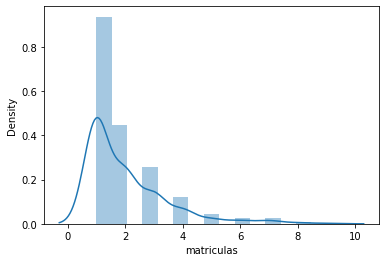

In [33]:
sns.distplot(nomes.matriculas)

In [34]:
# verificando com exatidão quantos alunos se escreveu em quantos cursos
nomes.matriculas.value_counts()

1    200
2     95
3     55
4     26
5      9
7      6
6      6
8      2
9      1
Name: matriculas, dtype: int64

In [35]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
23,FERNANDO,321,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,2
169,JOELMA,394,@dominiodoemail.com.br,joelma@dominiodoemail.com.br,1
148,APARECIDO,332,@dominiodoemail.com.br,aparecido@dominiodoemail.com.br,3
24,CLAUDIA,16,@servicodoemail.com,claudia@servicodoemail.com,4
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,1


# Selecionando Cursos
criando os cursos para cada aluno de maneira aleatória, ex: o aluno marcos que tem 2 matriculas, então o código vai escolher de forma aleatória os cursos de java e python

In [36]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
175,RIAN,209,@dominiodoemail.com.br,rian@dominiodoemail.com.br,2
96,TANIA,211,@servicodoemail.com,tania@servicodoemail.com,4
116,DOMINGOS,150,@servicodoemail.com,domingos@servicodoemail.com,1


In [37]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [38]:
# iterrows devolve linha a linha, ele passa então em cada linha
for index, row in nomes.iterrows():
  # buscando o id do aluno
  id = row.id_aluno
  # quantidade de matriculas 
  matriculas = row.matriculas
  # quantos cursos precisa escolher pro aluno baseado na quantidade de matricula
  for i in range(matriculas):
    # escolhendo um curso de cada vez baseado na matricula
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [39]:
matriculas.head()

,id_aluno,id_curso
0,235,12
1,43,14
2,43,3
3,304,7
4,156,3


In [40]:
# quantidade de aluno em cada curso
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_alunos'})

,quantidade_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web
4,17,Ruby on Rails
5,53,Cursos de Python
6,63,PHP com MySql
7,36,.NET para web
8,50,Novas integrações com Java
9,11,TDD com Java


In [41]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
66,PRISCILA,122,@servicodoemail.com,priscila@servicodoemail.com,2
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,1
159,ARNALDO,359,@servicodoemail.com,arnaldo@servicodoemail.com,1
128,EDVALDO,313,@servicodoemail.com,edvaldo@servicodoemail.com,3
99,WILLIAN,17,@servicodoemail.com,willian@servicodoemail.com,2


In [42]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [43]:
matriculas.head()

,id_aluno,id_curso
0,235,12
1,43,14
2,43,3
3,304,7
4,156,3


In [51]:
matriculas_por_cursos = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})

In [52]:
matriculas_por_cursos.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web
4,17,Ruby on Rails
5,53,Cursos de Python


# Exportando dataframe em diferentes formatos

In [53]:
matriculas_por_cursos.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web


In [54]:
matriculas_por_cursos.to_csv('matriculas_por_cursos.csv', index=False)

In [55]:
matriculas_json = matriculas_por_cursos.to_json()

In [56]:
print(matriculas_json)

{"quantidade_de_alunos":{"1":18,"2":34,"3":41,"4":17,"5":53,"6":63,"7":36,"8":50,"9":11,"10":1,"11":20,"12":69,"13":7,"14":63,"15":81,"16":45,"17":70,"18":17,"19":57,"20":54},"nome_do_curso":{"1":"L\u00f3gica de programa\u00e7\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\u00e7\u00f5es com Java","9":"TDD com Java","10":"C\u00f3digo limpo com C#","11":"Preparat\u00f3rio para certifica\u00e7\u00e3o Java","12":"Hardware b\u00e1sico","13":"Persist\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\u00e1lise de dados","16":"Estat\u00edstica b\u00e1sica","17":"Internet das coisas","18":"Programa\u00e7\u00e3o funcional","19":"Boas pr\u00e1ticas em Java","20":"Orienta\u00e7\u00e3o objetos com Java"}}


In [57]:
matriculas_html = matriculas_por_cursos.to_html()

In [ ]:
print(matriculas_html)

# Criando um banco de dados sql e trabalhando com ele
o pandas vem nativo com o sql lite

In [59]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from sqlalchemy import create_engine, MetaData, Table

In [61]:
engine = create_engine('sqlite:///:memory:')

In [62]:
engine

Engine(sqlite:///:memory:)

In [63]:
type(engine)

sqlalchemy.engine.base.Engine

In [64]:
matriculas_por_cursos.to_sql('matriculas', engine)

In [65]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando no banco sql
com query

In [66]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [67]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,18,Lógica de programação
1,4,17,Ruby on Rails
2,9,11,TDD com Java
3,10,1,Código limpo com C#
4,13,7,Persistência com .NET
5,18,17,Programação funcional


In [68]:
# buscando uma tabela inteira
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,18
1,Java para Web,34
2,C# para Web,41
3,Ruby on Rails,17
4,Cursos de Python,53
5,PHP com MySql,63
6,.NET para web,36
7,Novas integrações com Java,50
8,TDD com Java,11
9,Código limpo com C#,1


In [69]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [75]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos >= 70')

# Escrevendo no Banco

In [76]:
muitas_matriculas.to_sql('muitas_matricukas', con=engine)

In [77]:
print(engine.table_names())

['matriculas', 'muitas_matricukas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Escrevendo e Lendo arquivos de excel

In [78]:
# quantidade de aluno por curso
matriculas_por_cursos.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,18,Lógica de programação
2,34,Java para Web
3,41,C# para Web
4,17,Ruby on Rails
5,53,Cursos de Python


In [80]:
matriculas.head()

,id_aluno,id_curso
0,235,12
1,43,14
2,43,3
3,304,7
4,156,3


In [82]:
id_curso = 3
# selecionando na tabela matriculas todos os id_curso == 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [83]:
# todos os alunos que vao fazer o curso 3
proxima_turma

,id_aluno,id_curso
2,43,3
4,156,3
27,34,3
40,163,3
50,80,3
59,240,3
86,296,3
88,296,3
105,37,3
123,25,3


In [84]:
# fazendo um join das duas tabelas para saber quais alunos vao fazer o curso 3
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
25,3,DANIELE,@dominiodoemail.com.br,daniele@dominiodoemail.com.br,2
34,3,BRUNA,@servicodoemail.com,bruna@servicodoemail.com,2
37,3,ANDREIA,@dominiodoemail.com.br,andreia@dominiodoemail.com.br,4
38,3,ISADORA,@dominiodoemail.com.br,isadora@dominiodoemail.com.br,3
43,3,ANA,@servicodoemail.com,ana@servicodoemail.com,2
51,3,MANUEL,@dominiodoemail.com.br,manuel@dominiodoemail.com.br,3
71,3,OSMAR,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,3
71,3,OSMAR,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,3
80,3,VITORIA,@servicodoemail.com,vitoria@servicodoemail.com,3


In [85]:
# devolveu como serie
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
25        DANIELE
34          BRUNA
37        ANDREIA
38        ISADORA
43            ANA
51         MANUEL
71          OSMAR
71          OSMAR
80        VITORIA
91         LORENA
96       CAROLINA
108         LUIZA
122      PRISCILA
128       TAINARA
128       TAINARA
132         VITOR
147      VINICIOS
156       ANTONIA
163       LUCIANA
166        ROSANA
178       JOSIANE
184        JUNIOR
193    ALESSANDRA
196       ADRIANO
201       BARBARA
220        SAMUEL
224       EDUARDO
230        CARLOS
240         LUANA
278       SILVANA
294         DIEGO
296       DANIELA
296       DANIELA
308       REGIANE
332     APARECIDO
351       EMANUEL
352        SAMARA
378          HUGO
384        RENATO
387      ROSILENE
397        LILIAN
Name: nome, dtype: object

In [86]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
25,DANIELE
34,BRUNA
37,ANDREIA
38,ISADORA
43,ANA
51,MANUEL
71,OSMAR
71,OSMAR
80,VITORIA


In [92]:
# buscando o nome do curso
# retorno muitas informações e só precisamos do nome do curso
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    C# para Web
Name: 3, dtype: object

In [93]:
# então passamos no final a chave que contem o nome do curso no retorno do 
# código acima
nome_curso = nome_curso.nome_do_curso
nome_curso

'C# para Web'

In [94]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [95]:
proxima_turma

,nome
id_aluno,
25,DANIELE
34,BRUNA
37,ANDREIA
38,ISADORA
43,ANA
51,MANUEL
71,OSMAR
71,OSMAR
80,VITORIA


In [97]:
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {}'.format(nome_curso)})

In [99]:
proxima_turma.sample(5)

,Alunos do curso de C# para Web
id_aluno,
25,DANIELE
91,LORENA
352,SAMARA
224,EDUARDO
230,CARLOS


# Exportando para Excel

In [100]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)